Target Variable: SalePrice
1: Exploratory Data Analysis
2: Feature Engineering
3: Model Assessment with default parameters
4: Hyperparameter Optimization

In [58]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#The data have been separeted into train and test data. 
#Target Variable: SalePrice
#Test data: not SalePrice.
#Train data: contain SalePrice.

In [59]:
train = pd.read_csv('C:/Users/bchen/Downloads/train.csv')

In [60]:
test = pd.read_csv('C:/Users/bchen/Downloads/test.csv')

In [61]:
total_data = pd.concat([train, test], ignore_index=True)
total_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [62]:
#Id is unnecessary for model also "SalePrice" is target variable.
total_data.drop(["Id", "SalePrice"], axis=1, inplace=True)

1: Exploratory Data Analysis

In [66]:
def Explore_df(dataframe, head=5):
    print("--------------------- Shape ---------------------")
    print(dataframe.shape)
    print("--------------------- Types ---------------------")
    print(dataframe.dtypes)
    print("--------------------- Null ---------------------")
    var_list = []
    var_dtype = []
    null_rows = []
    value_rows = []
    ratio = []
    for col in dataframe.columns: 
        if dataframe[col].isnull().sum() > 0:
            var_list.append(col)
            var_dtype.append(dataframe[col].dtype)
            null_rows.append(dataframe[col].isnull().sum())
            value_rows.append(dataframe[col].notnull().sum())
            ratio.append(dataframe[col].isnull().sum() / dataframe.shape[0])
    new_df = pd.DataFrame(data=[var_list, var_dtype,  null_rows, value_rows, ratio]).T
    new_df.columns = ["variable_name", "type", "null_row_count", 
                      "value_row_count", "ratio"]
    print(new_df.sort_values("null_row_count", ascending=False))
    print("--------------------- Quantiles ---------------------")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [67]:
#apply it to train_data
Explore_df(total_data)

--------------------- Shape ---------------------
(2919, 79)
--------------------- Types ---------------------
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object
--------------------- Null ---------------------
   variable_name     type null_row_count value_row_count     ratio
30        PoolQC   object           2909              10  0.996574
32   MiscFeature   object           2814             105  0.964029
2          Alley   object           2721             198  0.932169
31         Fence   object           2348             571  0.804385
22   FireplaceQu   object           1420            1499  0.486468
1    LotFrontage  float64            486            2433  0.166495
25  GarageFinish   object            159            2760  0.054471
28 

The results of EDA is showing many missing value that may indicate no information. 
In this dataset, instead of value = 0, it has null value which means houses may 
have certain features but not presented on dataset. Therefore, the further analysis
might needed, find out the relationships between these variables and the target variable.

-------------------------------
variable_name | null_row_count
--------------|----------------
PoolQC        | 2909
MiscFeature   | 2814
Alley         | 2721
Fence         | 2348
FireplaceQu   | 1420

--------------------------------

PoolQC: Pool quality;
MiscFeature: Miscellaneous feature not covered in other categories
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
Alley: Type of alley access to property
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
Fence: Fence quality
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
FireplaceQu: Fireplace quality
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
We can see both from definition and the number of missing values of the variables 
there might have correlation relationship between these variables. We will further examine these variables 
and their dependencies. The dependency is important since we will assign values to missing ones. 
We should consider assigning values jointly to these variables.

-------------------------------
variable_name | null_row_count
--------------|----------------
BsmtExposure  | 82
BsmtFinType2  | 80
BsmtFinType1  | 79
BsmtCond      | 82
BsmtQual      | 81
GarageType    | 157
GarageYrBlt   | 159
GarageFinish  | 159
GarageQual    | 159
GarageCond    | 159

--------------------------------
As we can see, there are many variables has similar prefix like 'Bsmt/Garage', which might have the correlation
relationship amony them.
Analyze quantile values, majority of numerical variables don't have outliers. 
Inorder to aviod the bais with the limited number observations, 
should remain more observations from dataset. 
Switching outlier detection ratio from 25th and 75th percentiles to 5th and 95th percentiles.

EDA - 2: analyze the correlation between variables.
High correlation: remove variables (not include dependent variables which might impact outcome)
To make sure having more of them will not effect the result.

In [69]:
def correlated_variables(dataframe):
    corr_data = dataframe.corr()
    i = 0
    corr_dict = {}
    corr_list = []
    for col in corr_data.columns:
        i += 1
        for index in range(1, corr_data.shape[0]):
            if index >= i:
                if corr_data[col][index] < -0.50 or corr_data[col][index] > 0.50:
                    corr_list.append(corr_data.columns[index])
        if len(corr_list) > 0:
            corr_dict[col] = corr_list
        corr_list = []
    return corr_dict, corr_data

In [71]:
corr_dict, corr_data = correlated_variables(train) #we use train since SalePrice is in this dataframe
corr_dict

{'OverallQual': ['YearBuilt',
  'YearRemodAdd',
  'TotalBsmtSF',
  'GrLivArea',
  'FullBath',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'SalePrice'],
 'YearBuilt': ['YearRemodAdd', 'GarageYrBlt', 'GarageCars', 'SalePrice'],
 'YearRemodAdd': ['GarageYrBlt', 'SalePrice'],
 'BsmtFinSF1': ['TotalBsmtSF', 'BsmtFullBath'],
 'TotalBsmtSF': ['1stFlrSF', 'SalePrice'],
 '1stFlrSF': ['GrLivArea', 'SalePrice'],
 '2ndFlrSF': ['GrLivArea', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd'],
 'GrLivArea': ['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'],
 'FullBath': ['TotRmsAbvGrd', 'SalePrice'],
 'BedroomAbvGr': ['TotRmsAbvGrd'],
 'TotRmsAbvGrd': ['SalePrice'],
 'GarageYrBlt': ['GarageCars', 'GarageArea'],
 'GarageCars': ['GarageArea', 'SalePrice'],
 'GarageArea': ['SalePrice']}

From the result, there is high correlation between dependent variable "SalePrice" 
and "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", 
"FullBath", "TotRmsAbvGrd", "GarageCars" and "GarageArea".
We can start data selection, with these signateficant correlated variables among total 80 variables.
The first model that we could use those high correlated variables (10 dependent variable) to further analyze the impact.
We could compare first model with second model that contain all the variables, to compare performance.

In [73]:
#first model
model_f1_list = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", 
                   "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", 
                   "GarageArea"]
#next: feature engineering to train data

In [76]:
#EDA-3: categorize the variable types: numerical, categorical, cardinal
def def_col_categories(dataframe):
    cat_col = [col for col in dataframe.columns if dataframe[col].dtype == "O"
               or dataframe[col].nunique() <= 10]
    num_col = [col for col in dataframe.columns if dataframe[col].dtype != "O"
               and dataframe[col].nunique() > 10]
    
    return cat_col, num_col

In [77]:
cat_col, num_col = def_col_categories(total_data)

2: Feature Engineering
Handling Outliers
Handling Missing Values
Feature Scaling / Standardization

In [80]:
#define check outlier, apply to train dataset to detect columns of outliers
def check_outlier(dataframe, num_cols, lower_th = 0.05, upper_th = 0.95):
    outlier_cols = []
    outlier_lower_th = []
    outlier_upper_th = []
    outlier_number = []
    for col in num_cols:
        low = dataframe[col].quantile(lower_th)
        high = dataframe[col].quantile(upper_th)
        diff = high - low
        lower_lim = low - 1.5*diff
        higher_lim = high + 1.5*diff
        outlier_count = dataframe.loc[(dataframe[col] < lower_lim) | (dataframe[col] > higher_lim),col].count()
        if outlier_count:
            outlier_cols.append(col)
            outlier_lower_th.append(lower_lim)
            outlier_upper_th.append(higher_lim)
            outlier_number.append(outlier_count)
    new_df = pd.DataFrame(data=[outlier_cols, outlier_lower_th, outlier_upper_th, outlier_number]).T
    new_df.columns = ["variable_name", "lower_th", "upper_th", "outlier_count"]
    return outlier_cols, new_df.sort_values("outlier_count", ascending=False)

In [81]:
outlier_cols, outlier_df = check_outlier(train, num_col) # check on train
outlier_df

,variable_name,lower_th,upper_th,outlier_count
15,MiscVal,0.0,0.0,52
7,LowQualFinSF,0.0,0.0,26
12,3SsnPorch,0.0,0.0,24
1,LotArea,-17822.475,38535.325,15
4,BsmtFinSF2,-594.3,990.5,10
14,PoolArea,0.0,0.0,7
2,MasVnrArea,-684.0,1140.0,3
10,OpenPorchSF,-262.575,437.625,3
13,ScreenPorch,-240.0,400.0,3
0,LotFrontage,-75.5,216.5,2


Observations: 
1. more outliers;
2. less effect on lower threshold;
3. look at the variables has value = 0:
    MiscVal: Dollar Value of miscellaneous feature
    LowQualFinSF: Low quality finished square feet (all floors)
    3SsnPorch: Three season porch area in square feet
    PoolArea: Pool area in square feet
4. define above variables to categorical variables (0 if 0, 1 else);
5. for others with lower outliers, replace the value with thresholds;

In [82]:
#convert them into binary features: MiscVal, LowQualFinSF and 3SsnPorch
binary_var = ["MiscVal", "LowQualFinSF", "3SsnPorch", "PoolArea"]

In [83]:
def cat_convert(dataframe, binary_cols):    
    for col in binary_var:        
        dataframe[col] = dataframe[col].apply(lambda x: 0 if x==0 else 1)  
    return dataframe

In [84]:
#variables with outliers
outlier_cols = [col for col in outlier_cols if col not in binary_var and col != "SalePrice"]

In [88]:
def substitute_thresholds(dataframe, outlier_cols, outlier_df):
    for col in outlier_cols:
        upper_th = int(outlier_df.loc[outlier_df["variable_name"] == col, "upper_th"])
        dataframe[col] = dataframe[col].apply(lambda x: upper_th if x > upper_th else x) #accdentially replace null values if verse like x if x<upper_th else upper_th
    return dataframe

In [90]:
#apply to train & test
total_data = cat_convert(total_data, binary_var)
total_data = substitute_thresholds(total_data, outlier_cols, outlier_df)

Handling Missing Values
1st case: variables have many missing values, calcuated relation between target variable and related variables. 
relationship existed: create a new binary variable. 
relationship not existed: remove this variable.

In [100]:
#use the Mann-Whitney U test to assess whether 
#there is a statistically significant difference in the diagnosis selected variables with null or with value.
from scipy.stats import mannwhitneyu
many_null_var = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]

In [103]:
def null_var_with_target(dataframe, many_null_var):
    for col in many_null_var:
        print(col)        
        print(dataframe.loc[dataframe[col].isna(), "SalePrice"].mean()) #mean with null
        print(dataframe.loc[dataframe[col].notna(), "SalePrice"].mean()) #mean without null
        test_stat, pvalue = mannwhitneyu(dataframe.loc[dataframe[col].isna(),"SalePrice"], 
                                         dataframe.loc[dataframe[col].notna(),"SalePrice"])
        print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))#level of significance is 0.05

In [104]:
null_var_with_target(train, many_null_var) #Train data includes SalePrice

PoolQC
180404.66345492084
288138.5714285714
Test Stat = 2602.0000, p-value = 0.0257
MiscFeature
182046.41038406827
151623.94444444444
Test Stat = 46022.5000, p-value = 0.0080
Alley
183452.13148283417
142845.9120879121
Test Stat = 81078.0000, p-value = 0.0000
Fence
187596.83799830364
152912.00711743772
Test Stat = 213882.0000, p-value = 0.0000
FireplaceQu
141331.48260869566
216397.69220779222
Test Stat = 104141.5000, p-value = 0.0000


From mannwhitneyu test statistics,
alpha = 0.05
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
we could observe that there is significant difference between NA and other values for all 5 variables. 
This variables will remain in the model with modified versions (binary variables)

In [111]:
def binary_convert(dataframe, many_null_var):
    for col in many_null_var:
        dataframe.loc[dataframe[col].notna(), col] = 1
        dataframe.loc[dataframe[col].isna(), col] = 0        
    return dataframe

In [112]:
binary_convert(total_data, many_null_var)
total_data[many_null_var]

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
2914,1,1,1,1,1
2915,1,1,1,1,1
2916,1,1,1,1,1
2917,1,1,1,1,1


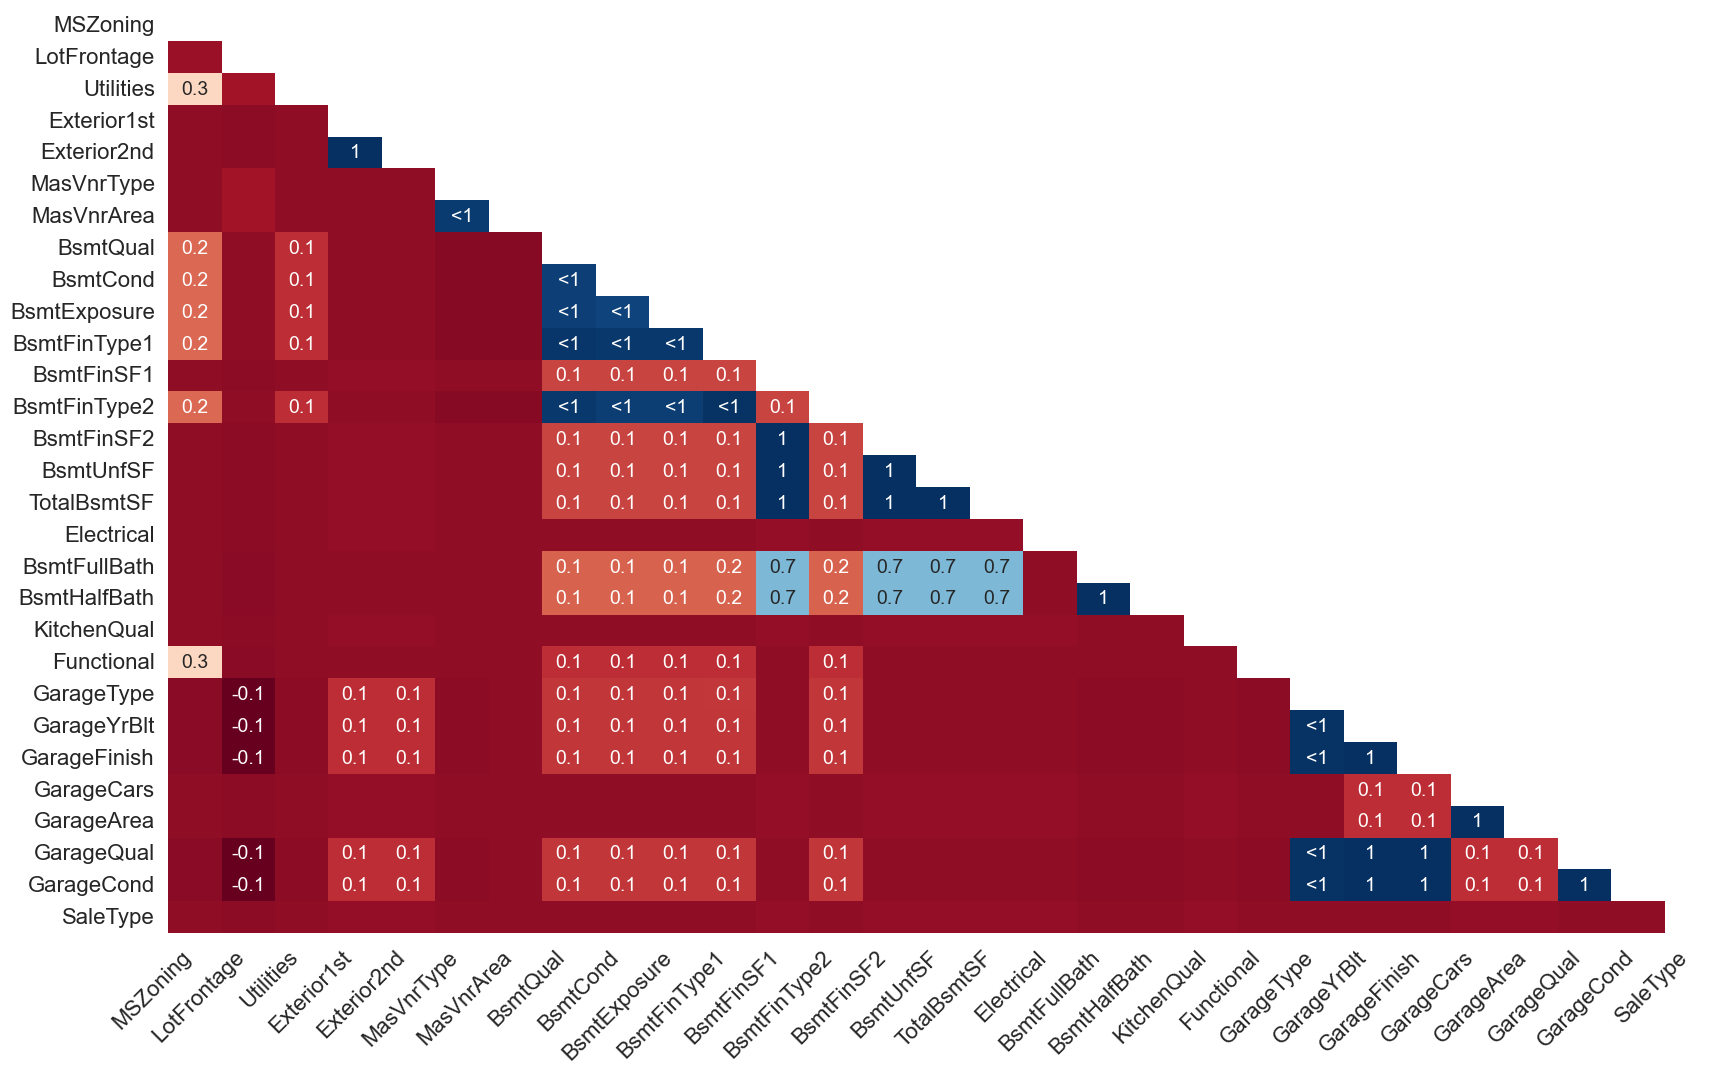

In [113]:
import missingno as msno #use missingno library to detect correlation beween missing values.
import matplotlib.pyplot as plt
msno.heatmap(total_data)
plt.show()

Values close to +1 indicate that correlation existed.
Values close to -1 indicate that correlation not existed.
Values close to 0, indicate there is little to no relationship between the columns with null values 
columns without null values.

From the heatmap, high correlation existed between variables with missing values. 
pass the values to missing ones with same methodology with insignficant number of missing observations. 
numerical variables: mean values -> missing value
categorical variables: mode values -> missing value

In [114]:
#numerical variables with missing values:
numvar_missing = [col for col in num_col if total_data[col].isnull().sum()]

In [118]:
for col in numvar_missing:
    total_data.loc[total_data[col].isnull(), col] = total_data[col].mean()

In [121]:
#categorical variables with missing values:
catvar_missing = [col for col in cat_col if total_data[col].isnull().sum()]

In [122]:
for col in catvar_missing:
    total_data.loc[total_data[col].isnull(), col] = total_data[col].mode()[0]

Feature Scaling / Standardization

categorical variables: Only scaling/standardize on the categorical variables to aviod create many new variables 
to increase the complexity of computation due to many variables existed.
For the high correlation betwee SalePrice and categorical variable, 
have all of the different values (variables in model_f1_list and dtype = object)
other categorical variables with < %2 (~60) observation frequency use Rare value.

numerical columns: MinMaxScaler

In [125]:
#categorical variables
def std_cat_var(dataframe,cat_var):
    for var in cat_var:
        if var not in model_f1_list:
            for value in dataframe[var].value_counts().index:
                if dataframe.loc[dataframe[var] == value, var].count() / \
                dataframe.shape[0] < 0.02:
                    dataframe.loc[dataframe[var] == value, var] = "rare"
    dataframe = pd.get_dummies(dataframe, columns=cat_var, drop_first=True)
    return dataframe

In [127]:
total_data = std_cat_var(total_data, cat_col)
total_data.head()

C:\Users\bchen\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_RL,MSZoning_RM,MSZoning_rare,Street_rare,LotShape_IR2,LotShape_Reg,LotShape_rare,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_rare,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_rare,LandSlope_Mod,LandSlope_rare,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_rare,Condition1_Feedr,Condition1_Norm,Condition1_rare,Condition2_rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_rare,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_rare,RoofStyle_Hip,RoofStyle_rare,RoofMatl_rare,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_rare,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_rare,MasVnrType_None,MasVnrType_Stone,MasVnrType_rare,ExterQual_Gd,ExterQual_TA,ExterQual_rare,ExterCond_Gd,ExterCond_TA,ExterCond_rare,Foundation_CBlock,Foundation_PConc,Foundation_rare,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtCond_rare,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_rare,Heating_rare,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,HeatingQC_rare,CentralAir_Y,Electrical_SBrkr,Electrical_rare,BsmtFullBath_1.0,BsmtFullBath_rare,BsmtHalfBath_1.0,BsmtHalfBath_rare,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_rare,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_rare,KitchenAbvGr_2,KitchenAbvGr_rare,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Typ,Functional_rare,Fireplaces_1,Fireplaces_2,Fireplaces_rare,GarageType_BuiltIn,GarageType_Detchd,GarageType_rare,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,GarageQual_TA,GarageQual_rare,GarageCond_TA,GarageCond_rare,PavedDrive_P,PavedDrive_Y,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_New,SaleType_WD,SaleType_rare,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_rare
0,60,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,8,2003.0,548.0,0,61,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
1,20,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,6,1976.0,460.0,298,0,0,0,0,0,0,5,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0
2,60,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,6,2001.0,608.0,0,42,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0

In [130]:
#numerical variables
from sklearn.preprocessing import MinMaxScaler #normalization and standardization Numerical Data Scaling (0, 1)

In [131]:
sc = MinMaxScaler((0, 1))
total_data[num_col] = sc.fit_transform(total_data[num_col])
total_data[num_col]

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,0.235294,0.225641,0.192024,0.949275,0.883333,0.171930,0.221664,0.0,0.064212,0.237580,0.161410,0.413559,0.0,0.301821,0.461538,0.346154,0.368280,0.000000,0.139588,0.000000,0.0,0.0,0.0,0.0,0.090909
1,0.000000,0.302564,0.222909,0.753623,0.433333,0.000000,0.307064,0.0,0.121575,0.350264,0.286951,0.000000,0.0,0.203553,0.307692,0.259615,0.309140,0.356033,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636
2,0.235294,0.241026,0.267222,0.934783,0.866667,0.142105,0.152590,0.0,0.185788,0.255343,0.181200,0.419370,0.0,0.318491,0.307692,0.339744,0.408602,0.000000,0.096110,0.000000,0.0,0.0,0.0,0.0,0.727273
3,0.294118,0.200000,0.221566,0.311594,0.333333,0.000000,0.067818,0.0,0.231164,0.209825,0.193878,0.366102,0.0,0.303356,0.384615,0.330128,0.431452,0.000000,0.080092,0.604444,0.0,0.0,0.0,0.0,0.090909
4,0.235294,0.323077,0.348060,0.927536,0.833333,0.307018,0.205651,0.0,0.209760,0.317791,0.250773,0.509927,0.0,0.408862,0.538462,0.336538,0.561828,0.229391,0.192220,0.000000,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,0.000000,0.017081,0.710145,0.333333,0.000000,0.000000,0.0,0.233733,0.151540,0.065553,0.264407,0.0,0.166265,0.230769,0.266389,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.454545
2915,0.823529,0.000000,0.015953,0.710145,0.333333,0.000000,0.079121,0.0,0.125856,0.151540,0.065553,0.264407,0.0,0.166265,0.307692,0.240385,0.192204,0.000000,0.054920,0.000000,0.0,0.0,0.0,0.0,0.272727
2916,0.000000,0.712821,0.502216,0.637681,0.766667,0.000000,0.384301,0.0,0.000000,0.339717,0.275201,0.000000,0.0,0.195218,0.384615,0.208333,0.387097,0.566308,0.000000,0.000000,0.0,0.0,0.0,0.0,0.727273
2917,0.382353,0.210256,0.245495,0.869565,0.700000,0.000000,0.105808,0.0,0.246147,0.253122,0.196660,0.000000,0.0,0.139504,0.307692,0.266389,0.000000,0.095579,0.073227,0.000000,0.0,0.0,0.0,1.0,0.545455


3: Model Assessment with default parameters

In [139]:
#First, we import models that we use
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor #grows tree leaf-wise, can reduce more loss than a level-wise algorithm.
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, GridSearchCV

In [140]:
# Mean Squared Error, Mean absolute error to evaluate the performance of the model, The lower the value the more accurate the model is
scores = ["neg_mean_squared_error", "neg_mean_absolute_error"]

In [141]:
def base_models(X, y, scoring):
    print("Base Models....")
    regression_models = [('LinReg', LinearRegression()),
                   ("LGBM", LGBMRegressor()),                   
                   ("RF", RandomForestRegressor()),                   
                   ('Adaboost', AdaBoostRegressor()),
                   ("XGB", XGBRegressor()),
                   ]    
    model_dict = {}
    for name, model in regression_models:
        model_dict[name] = {}
        for score in scoring:
            cv_results = cross_validate(model, X, y, cv=5, scoring=score)
            model_dict[name][score] = round(-1*cv_results['test_score'].mean(), 2)
            print(f"{score}: {round(-1*cv_results['test_score'].mean(), 2)} ({name}) ")
    return model_dict

In [142]:
base_model_results = base_models(total_data.iloc[:1460], train["SalePrice"], scores)
base_model_results

Base Models....
neg_mean_squared_error: 1.7704401527657976e+32 (LinReg) 
neg_mean_absolute_error: 512404245368616.94 (LinReg) 
neg_mean_squared_error: 925582629.71 (LGBM) 
neg_mean_absolute_error: 17611.33 (LGBM) 
neg_mean_squared_error: 957361506.03 (RF) 
neg_mean_absolute_error: 18332.34 (RF) 
neg_mean_squared_error: 1370317593.32 (Adaboost) 
neg_mean_absolute_error: 25938.51 (Adaboost) 


C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

neg_mean_squared_error: 1038050655.5 (XGB) 


C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

neg_mean_absolute_error: 18890.88 (XGB) 


{'LinReg': {'neg_mean_squared_error': 1.7704401527657976e+32,
  'neg_mean_absolute_error': 512404245368616.94},
 'LGBM': {'neg_mean_squared_error': 925582629.71,
  'neg_mean_absolute_error': 17611.33},
 'RF': {'neg_mean_squared_error': 957361506.03,
  'neg_mean_absolute_error': 18332.34},
 'Adaboost': {'neg_mean_squared_error': 1370317593.32,
  'neg_mean_absolute_error': 25938.51},
 'XGB': {'neg_mean_squared_error': 1038050655.5,
  'neg_mean_absolute_error': 18890.88}}

Linear Regression model gives much worse results than the other ones. 
LGBM preform better in this case.
hyperparameter (tuning): Grid Search -> check the preformance improvement on diff models
Each iteration tries a combination of hyperparameters in a specific order. It fits the model on each and every combination of hyperparameters possible and records the model performance. Finally, it returns the best model with the best hyperparameters.

In [151]:
#define different hyperparameters for 3 models
#If you wish to speed up your random forest, lower the number of estimators. 
#If you want to increase the accuracy of your model, increase the number of trees.
rf_params = {"max_depth": [15, 25], "max_features": [5, "auto"], "min_samples_split": [10, 50], "n_estimators": [100, 300]}

In [152]:
#reduce overfitting,and learns which path to take for missing values in future.
#splits upto the max_depth,start pruning the tree backwards and remove splits beyond which there is no positive gain.
xgboost_params = {"learning_rate": [0.1, 0.01], "max_depth": [5, 20], "n_estimators": [100, 500], "colsample_bytree": [0.4, 0.7]}

In [153]:
lightgbm_params = {"learning_rate": [0.1, 0.01], "n_estimators": [100, 500], "colsample_bytree": [0.3, 0.7]}

In [154]:
regression_models = [("LGBM", LGBMRegressor(), lightgbm_params),                   
                   ("RF", RandomForestRegressor(), rf_params),             
                   ("XGB", XGBRegressor(use_label_encoder=False), xgboost_params),]

In [155]:
def hyperparameter_models(X, y, scoring, cv=5):
    print("---------------- Hyperparameter Optimization ----------------")
    best_models = {}
    for name, regressor, params in regression_models:
        print(f"---------------- {name} ----------------")
        for score in scoring:
            cv_results = cross_validate(regressor, X, y, cv=cv, scoring=score)
            print(f"{score} (Before): {-1*round(cv_results['test_score'].mean(), 4)}")
        gs_best = GridSearchCV(regressor, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = regressor.set_params(**gs_best.best_params_)

        for score in scoring:
            cv_results = cross_validate(final_model, X, y, cv=cv, scoring=score)
            print(f"{score} (After): {-1*round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [156]:
tuned_model_results = hyperparameter_models(total_data.iloc[:1460], train["SalePrice"], scores)

---------------- Hyperparameter Optimization ----------------
---------------- LGBM ----------------
neg_mean_squared_error (Before): 925582629.7079
neg_mean_absolute_error (Before): 17611.3281
neg_mean_squared_error (After): 835758006.9033
neg_mean_absolute_error (After): 16246.9898
LGBM best params: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'n_estimators': 500}

---------------- RF ----------------
neg_mean_squared_error (Before): 974826896.5214
neg_mean_absolute_error (Before): 18179.321
neg_mean_squared_error (After): 990091460.2649
neg_mean_absolute_error (After): 18490.3867
RF best params: {'max_depth': 25, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 100}

---------------- XGB ----------------


C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

neg_mean_squared_error (Before): 1038050655.4987


C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

neg_mean_absolute_error (Before): 18890.8762


C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

neg_mean_squared_error (After): 759813982.5702


C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

neg_mean_absolute_error (After): 16339.391
XGB best params: {'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}



Before tuning parameters
best model: LGBM. 
after tuning parameters
best model: XGB  
hyperparameter optimization play important role in our preformance among models.

In [157]:
#plot the important features in data set
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
def plot_importance(model, features, num):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 
                                'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

C:\Users\bchen\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


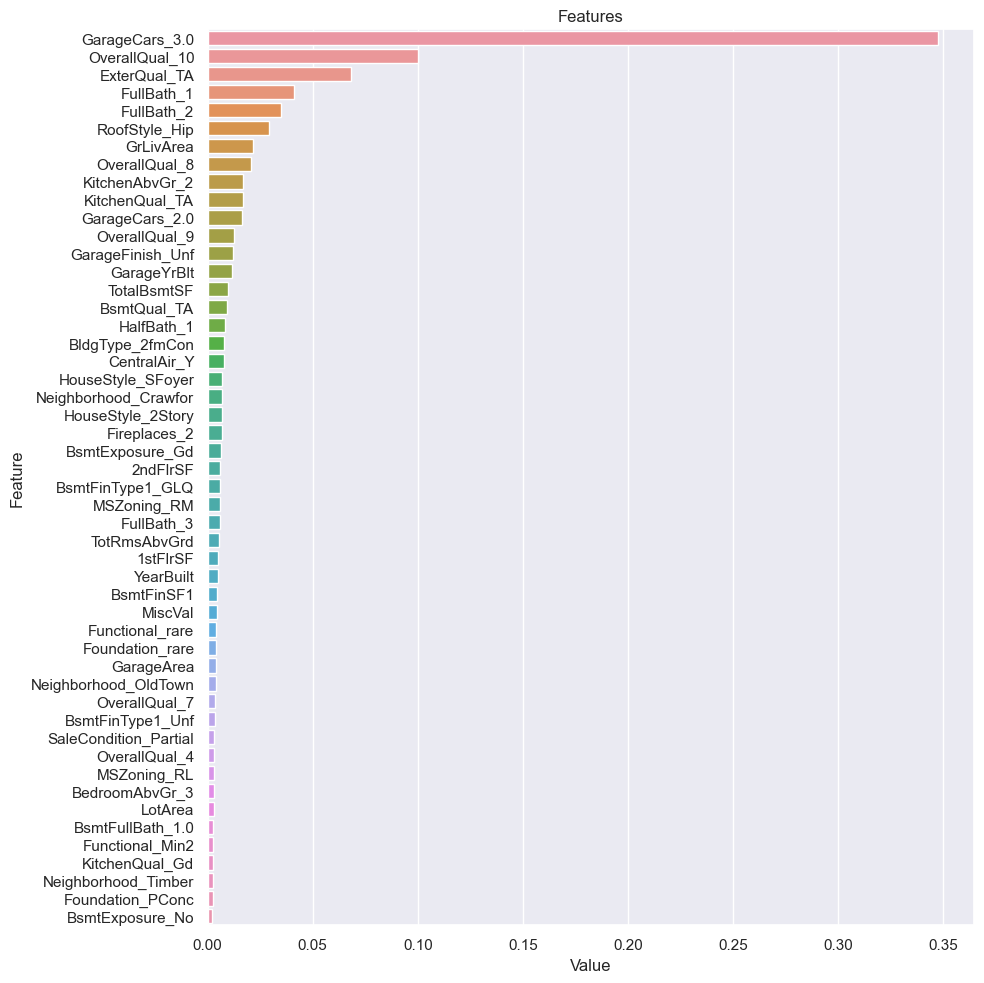

In [165]:
final_model = tuned_model_results["XGB"].fit(total_data.iloc[:1460], train["SalePrice"])    
plot_importance(final_model, total_data, 50)

In [170]:
#Finally, predict SalePrice 
submission = pd.DataFrame()

In [171]:
submission["SalePrice"] = final_model.predict(total_data.iloc[1460:])

In [172]:
submission.index = test["Id"]

In [173]:
submission.to_csv("final_model.csv")